In [2]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(purrr) 
library(scales)
if (!require(extrafont)) install.packages("extrafont")
library(extrafont)

# 2. 시스템 폰트 가져오기 (처음 한 번만 실행하면 됨)
# font_import()  # 이 작업은 시간이 좀 걸립니다

# 3. 폰트 로드
loadfonts()



다음의 패키지를 부착합니다: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



다음의 패키지를 부착합니다: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


필요한 패키지를 로딩중입니다: extrafont

Registering fonts with R

cmex10 already registered with pdfFont().

cmmi10 already registered with pdfFont().

cmr10 already registered with pdfFont().

cmsy10 already registered with pdfFont().

DejaVu Sans already registered with pdfFont().

DejaVu Sans Condensed already registered with pdfFont().

DejaVu Sans Light already registered with pdfFont().

esint10 already registered with pdfFont().

eufm10 already registered with pdfFont().

Liberation Mono already registered with pdfFont().

msam10 already registered with pdfFont().

msbm10 already registered with pdfFont().

rsfs10 already registered with pdfFont().

stmary10 already registered with pdfFont().

wasy10 a

In [3]:
# 공통 테마 함수 정의
get_nature_theme <- function() {
    theme_bw() +
        theme(
            # 전체적인 배경
            panel.background = element_rect(fill = NA, color = NA),
            panel.grid.major = element_blank(),
            panel.grid.minor = element_blank(),
            panel.border = element_rect(color = "black", fill = NA, size = 0.6),  # size로 선 굵기 조절
            
            # panel.border = element_blank(),  
            
            # 축 설정
            # axis.line.x.top = element_line(color = "black", size = 0.3),  
            # axis.line.y.right = element_line(color = "black", size = 0.3),  
            # axis.line.x.bottom = element_line(color = "black", size = 0.3),  
            # axis.line.y.left = element_line(color = "black", size = 0.3),    
            axis.text = element_text(size = 6.5, color = "black"),
            axis.title = element_text(size = 7.5, color = "black"),
            axis.ticks = element_line(size = 0.3),
            axis.ticks.length = unit(0.8, "mm"),
            
            # 메인 figure에 박스 추가
            # plot.background = element_rect(color = "black", fill = NA),
            
            # legend 박스 제거
            legend.box.background = element_blank(),  # 이전: element_rect(color = "black")
            
            # 범례 설정
            legend.margin = margin(1, 1, 1, 1, unit = "mm"),
            # legend.spacing.y = unit(0.1, "cm"),
            
            # 여백 설정
            # plot.margin = unit(c(0.1, 0.2, 0.1, 0.1), "cm")
            plot.margin = margin(1, 1, 1, 1, unit = "mm")
        )
}

In [4]:
source <- "UKB"

# Step 1. Load relationship information data

In [5]:
# 방법 1: paste0() 사용
df_rel_info <- read.csv(
    paste0("/data/jerrylee/pjt/BIGFAM.v.2.0/data/", source, "/relationship_information/relatives.formatted.info"),
    sep="\t"
)

head(df_rel_info)

,DOR,rcode,relationship,volid,relid,volage,relage,volsex,relsex,Erx
,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,1,SB,daughter-sister,1000094,3653174,65,64,F,F,0.75
2,1,,,1000220,1691267,64,64,F,F,NA
3,1,,,1000286,1571411,53,70,F,F,NA
4,1,,,1000295,1045127,60,41,F,F,NA
5,1,,,1000476,3599303,50,51,F,M,NA
6,1,,,1000615,4315497,60,58,F,M,NA


In [6]:
dim(df_rel_info)

[1] 81326    10

In [7]:
# df_rel_info <- df_rel_info %>% filter((volid == 1000094) | (relid == 54887))
df_rel_info <- df_rel_info %>% filter((volid == 1000094) | (relid == 1000094))
df_rel_info

DOR,rcode,relationship,volid,relid,volage,relage,volsex,relsex,Erx
<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<dbl>
1,SB,daughter-sister,1000094,3653174,65,64,F,F,0.75


# Load kinship in UKB

In [8]:
# 방법 1: paste0() 사용
df_kinship <- read.csv(
    "/data01/UKB202005/data/genotype/ukbgene_rel/ukb59688_rel_s488249.dat",
    sep=" "
)

df_kinship$Kinship <- 2 * df_kinship$Kinship

head(df_kinship)

,ID1,ID2,HetHet,IBS0,Kinship
,<int>,<int>,<dbl>,<dbl>,<dbl>
1,1000094,3653174,0.077,0.0052,0.4942
2,1000174,3765836,0.052,0.0092,0.2504
3,1000174,4593489,0.054,0.0079,0.2868
4,1000220,1691267,0.082,0.0037,0.5520
5,1000220,5516453,0.050,0.0123,0.1798
6,1000243,2489078,0.044,0.0150,0.1070


In [9]:
df_kinship_filtered <- df_kinship %>% filter(Kinship > 0)

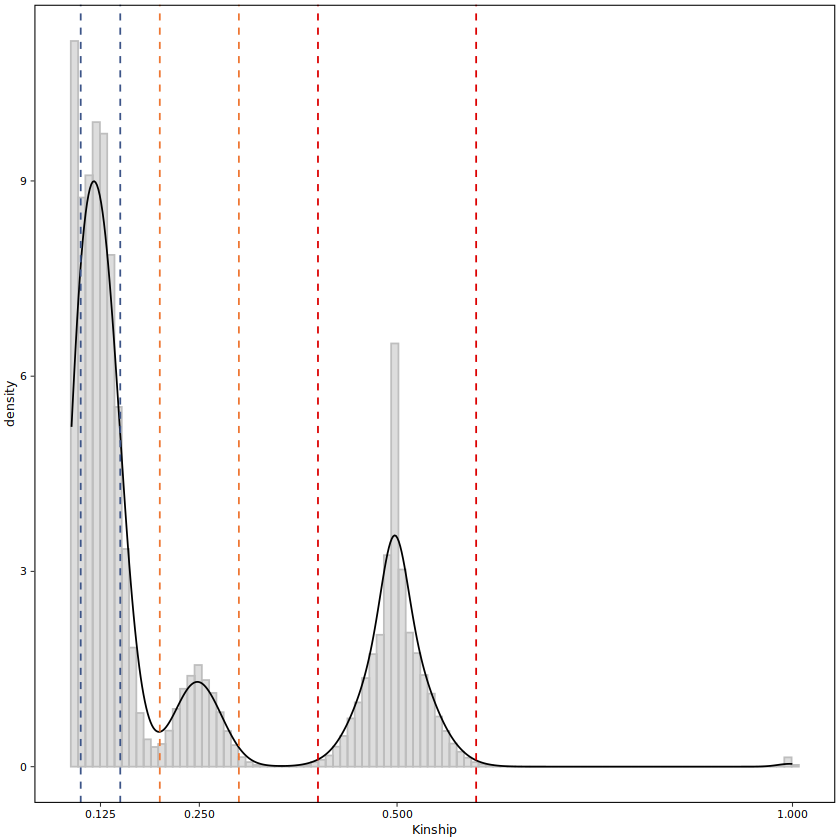

In [15]:
p <- ggplot(
    df_kinship_filtered, aes(x = Kinship)) +
    scale_x_continuous(breaks = c(0.125, 0.25, 0.5, 1)) +
    geom_histogram(aes(y = ..density..), alpha = 0.2, bins = 100, color = "grey") +
    geom_density() + 
    # 1촌 관계 (0.4-0.6)
    geom_vline(xintercept = c(0.4, 0.6), 
               color = "#DC0000", 
               linetype = "dashed",
               size = 0.5) +
    # 2촌 관계 (0.2-0.3)
    geom_vline(xintercept = c(0.2, 0.3), 
               color = "#EE7733", 
               linetype = "dashed",
               size = 0.5) +
    # 3촌 관계 (0.1-0.15)
    geom_vline(xintercept = c(0.1, 0.15), 
               color = "#3C5488", 
               linetype = "dashed",
               size = 0.5) +
    get_nature_theme()

p

In [16]:
# Save plot
ggsave(
    "/data/jerrylee/pjt/BIGFAM.v.2.0/figures/UKB.kinship.pdf",
    plot = p,
    width = 177,
    height = 55,
    dpi = 300,
    units = "mm"
)